# Part II - Fordgobike_Data_Explanatory_Presentation

## by Kolawole Ayoko


### Taking a look at the Duration of trips between stations and other features of the dataset that influences it.

## Investigation Overview

In this investigation, I wanted to look at the duration of trips between stations in a fordgobike sharing event

## Dataset Overview

The data consisted of the information of trips between stations in a bike sharing event, features like member_birth_year, subscriber type as well as longitude and lattitudes were already present. more columns like distance between stations, speed and member_age were generated to aid analysis.

In [95]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [96]:
# Load in the dataset using pandas
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [97]:
# Dropping all Empty rows
df.dropna(inplace=True)

In [98]:
## to calculate the distance between the two geolocations
import haversine as hs
from haversine import Unit

In [99]:
def haversine(lat1, long1, lat2, long2):
    """
    This function takes in the two locations by their longitude and lattitude then
    uses the haversine module to calculate the distance between them
    """
    loc1 = (lat1, long1)
    loc2 = (lat2, long2)
    
    
    
    return hs.haversine(loc1, loc2, unit=Unit.MILES)

In [100]:
# Calculating the distance(in miles) between the various start and end points
df['distance_miles'] = df.apply( lambda x : haversine(x['start_station_latitude'], x['start_station_longitude'],  x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [101]:
# Converting the duration of the trips in seconds to hours (1 hour = 3600s)
df['duration_hrs'] = df.apply(lambda x : x['duration_sec'] / 3600, axis=1)

#### Since we know the distance and the time for the trips, then we can calculate the speed of the Journey.

speed = Distance / Time

In [102]:
# Working out the speed
df['speed_mph'] = df['distance_miles'] / df['duration_hrs']

# Converting the start time and end times into datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Converting usertype, member_gender and bikeshare_for_all_trip into categorical data
df["user_type"] = df.user_type.astype('category')
df["member_gender"] = df.member_gender.astype('category')
df["bike_share_for_all_trip"] = df.bike_share_for_all_trip.astype('category')

# Getting member's age from their birth year
df["member_age"] = 2019 - df["member_birth_year"]

# Start time  day of week
df["start_time"].dt.day_of_week
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_ride'] = df['start_time'].dt.day_of_week.apply(lambda x : days[x])

# Hour of Ride
df["start_hour"] = df["start_time"].dt.hour

In [103]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_miles,duration_hrs,speed_mph,member_age,day_of_ride,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,0.338467,14.495833,0.023349,35.0,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,1.680529,17.181667,0.097809,47.0,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,0.162016,10.136111,0.015984,30.0,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,1.497073,0.440278,3.400291,45.0,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2.070538,0.498056,4.157242,60.0,Thursday,23


### Distribution of Rides by Days

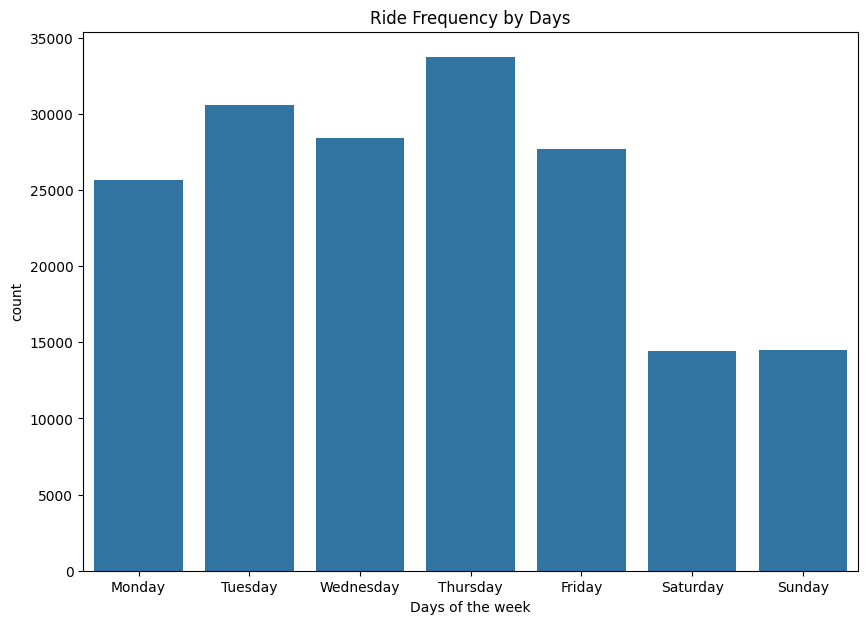

In [104]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'day_of_ride', color = sns.color_palette()[0], order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

#### Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.

### Distribution of Rides by start hour

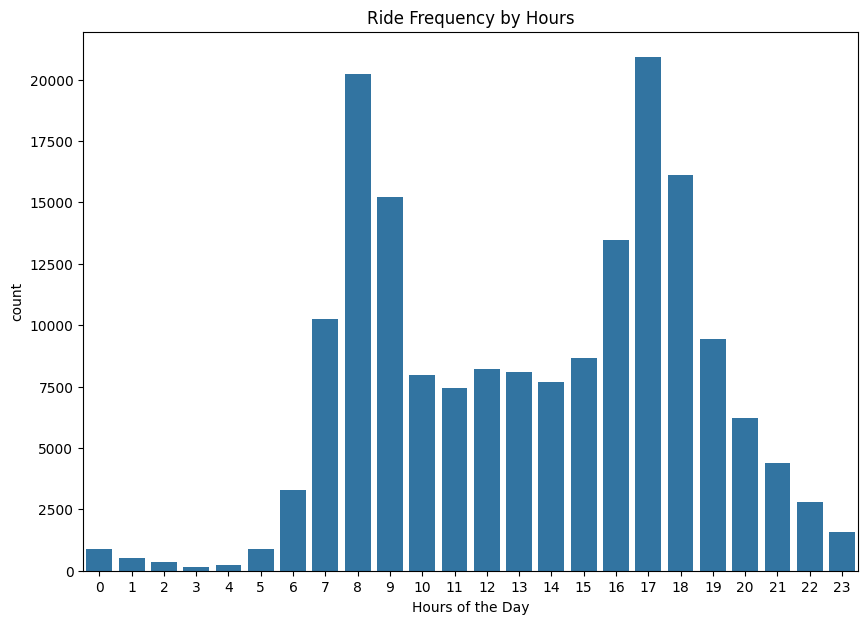

In [105]:
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x = 'start_hour', color = sns.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

#### The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) might be linked to rush hours where people leave for work and come back later in the evening.

### Distribution of rides by User Type

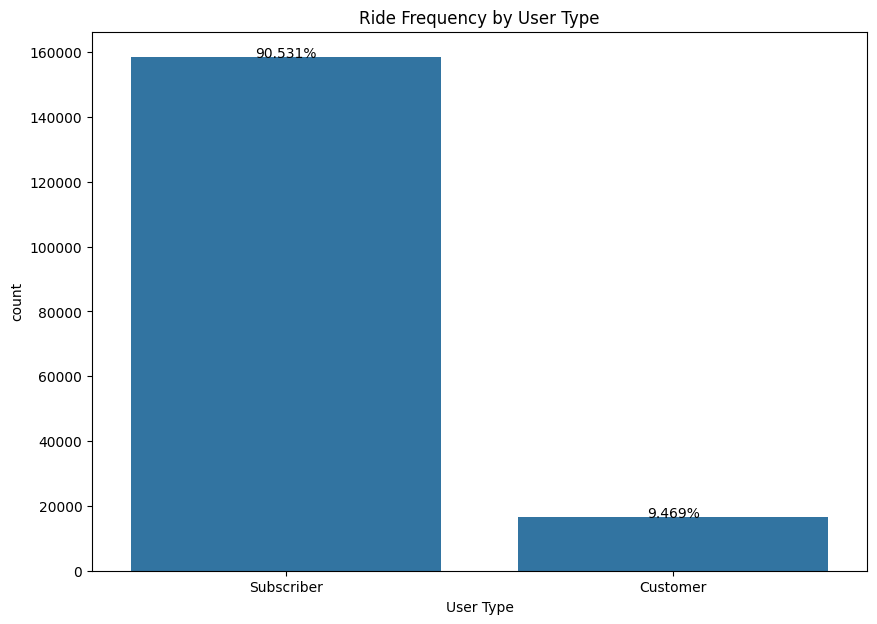

In [106]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(data = df, x = 'user_type',  color=sns.color_palette()[0], order=df.user_type.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type');

#### It shows from the figure above that subscribers account for 90% of the total rides

### Checking the distribution of the duration of the rides according to user type

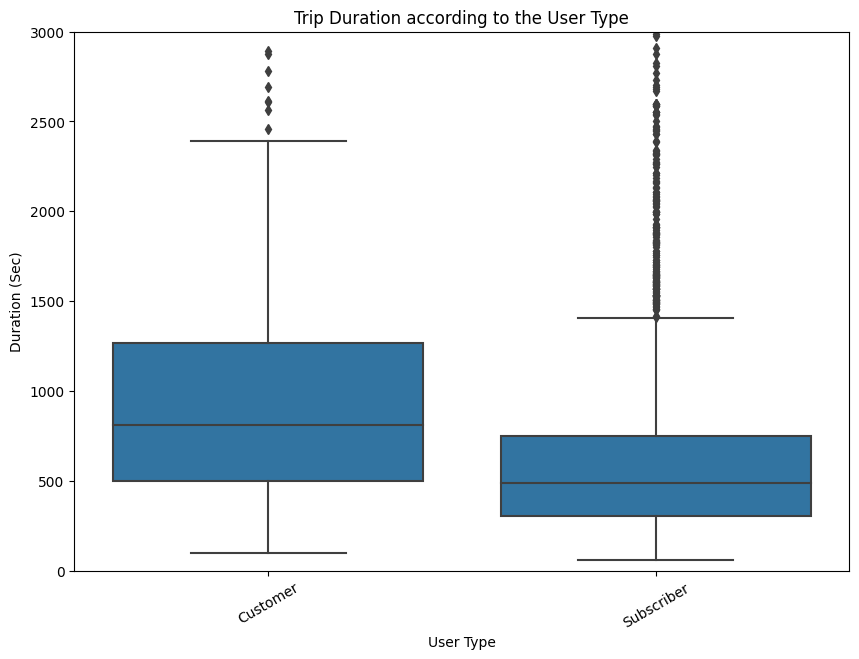

In [107]:
plt.figure(figsize=[10, 7])
vis_data = df.sample(5000)

default_color = sns.color_palette()[0]

g = sns.boxplot(data = vis_data, y= 'duration_sec', x =  'user_type', color=default_color)

g.tick_params(axis="x", rotation=30)
plt.ylim([0,3000])
plt.xlabel('User Type')
plt.ylabel('Duration (Sec)')
plt.title('Trip Duration according to the User Type');

#### In general, Customers tend to spend more time on trips than Subscriber

### Checking the distribution of the duration of the rides according to the day of ride

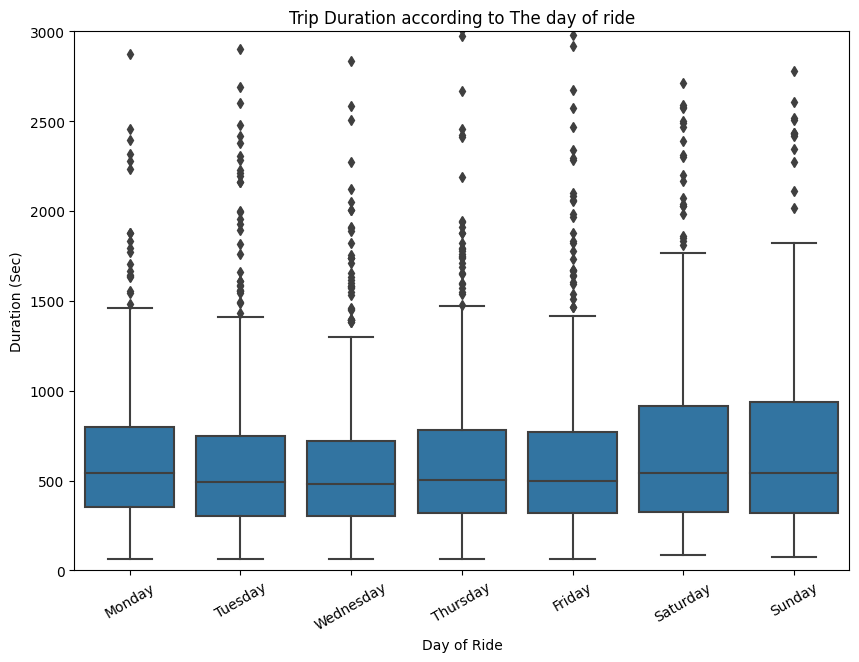

In [108]:
plt.figure(figsize=[10, 7])
vis_data = df.sample(5000)

default_color = sns.color_palette()[0]

g = sns.boxplot(data = vis_data, y= 'duration_sec', x =  'day_of_ride', color=default_color, order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])

g.tick_params(axis="x", rotation=30)
plt.ylim([0,3000])
plt.xlabel('Day of Ride')
plt.ylabel('Duration (Sec)')
plt.title('Trip Duration according to The day of ride');

#### Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records

### Duration of Trips across user types and days of the week

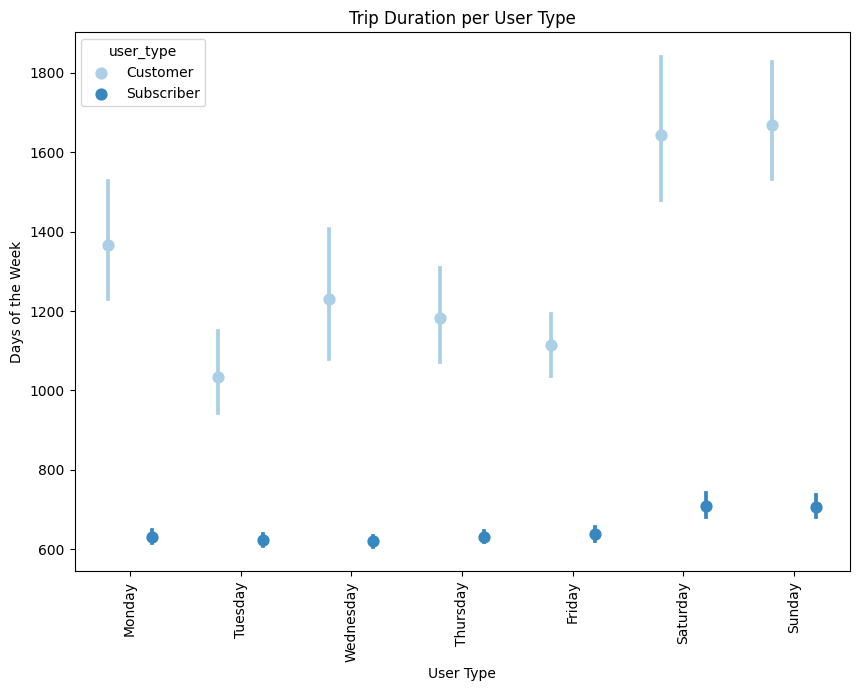

In [109]:
fig = plt.figure(figsize=[10, 7])
g = sns.pointplot(data = df, x ='day_of_ride', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
plt.xlabel('User Type')
plt.ylabel('Days of the Week')
plt.title('Trip Duration per User Type')
g.tick_params(axis="x", rotation=90)
g.set_yticklabels([],minor = True);

#### Customer trips take a longer duration regardless of the day of the week(longest on weekends) whereas subscribers generally travel a short distance with a little increase on weekends but not up to that of the customers.

### Generating Slideshow

In [110]:
!jupyter nbconvert Akinrele_Joshua_Explanatory_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Akinrele_Joshua_Explanatory_Analysis.ipynb to slides
[NbConvertApp] Writing 840040 bytes to Akinrele_Joshua_Explanatory_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\envs\GEOSTUFFS\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\DELL\anaconda3\envs\GEOSTUFFS\lib\site-packages\jupyter_core\application.py", line 276, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\DELL\anaconda3\envs\GEOSTUFFS\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\DELL\anaconda3\envs\GEOSTUFFS\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\DELL\anaconda3\envs\GEOSTUFFS\lib\site-packages\nbconvert\nbconvertapp.py", 